In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
class CustomSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=20):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self, X, threshold=0.4):
        approx = np.dot(X, self.w) - self.b
        return np.where(approx > threshold, 1, -1)



In [3]:
# Load the datasets
true_data = pd.read_csv('processedTrue.csv')
fake_data = pd.read_csv('processedFake.csv')

In [4]:
# Concatenate the datasets
data = pd.concat([true_data, fake_data], ignore_index=True, sort=False)

# Rename the columns
data.columns = ['index', 'label', 'content']

In [5]:
# Extract features and labels
X = data['content']
y = data['label']

# Convert label 0 to -1 for SVM
y = np.where(y == 0, -1, 1)

In [6]:
# Splitting the data into training and testing sets
# Assuming 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [9]:
# Creating an instance of the CustomSVM classifier
custom_svm_classifier = CustomSVM()

In [10]:
# Training the classifier
custom_svm_classifier.fit(X_train_vectorized.toarray(), y_train)

In [11]:
# Predicting on the test set with a threshold of 0.6
y_pred = custom_svm_classifier.predict(X_test_vectorized.toarray(), threshold=0.6)

In [12]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9080882352941176


In [28]:
# Predicting labels for the training set
X_train_prediction = custom_svm_classifier.predict(X_train_vectorized.toarray(), threshold=0.6)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, X_train_prediction)
print('Training Accuracy:', training_accuracy)

# Predicting labels for the test set
X_test_prediction = custom_svm_classifier.predict(X_test_vectorized.toarray(), threshold=0.6)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, X_test_prediction)
print('Testing Accuracy:', testing_accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9115623520236205
Testing Accuracy: 0.9080882352941176
Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.97      0.91      4317
           1       0.97      0.85      0.91      4659

    accuracy                           0.91      8976
   macro avg       0.91      0.91      0.91      8976
weighted avg       0.92      0.91      0.91      8976



In [29]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[4205  112]
 [ 713 3946]]


In [14]:
# import pickle
# filename = 'model.pkl'
# pickle.dump(custom_svm_classifier, open(filename, 'wb'))

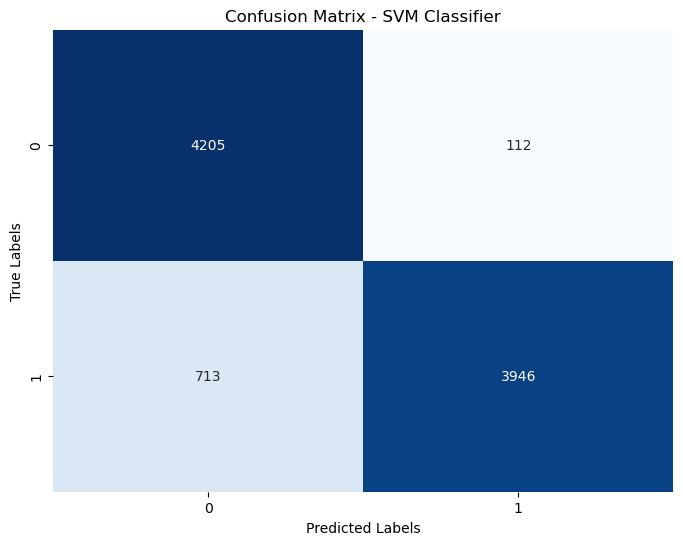

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()